<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weektwo/channels_and_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
symbol_rate = 10e9 #10 gigabauds
lambda_light = 1550e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
measured_nm =[1517,	1517.1683,1517.5523	,1517.9365,	1518.3209,1518.7055,1519.0902,1519.4752,1520.6313,1521.017,1521.403,1521.7891,1522.1755,1522.562,1522.9487,1523.3357,1523.7228,1524.1101,1524.4976,1524.8853,1525.2733,1525.6614,1526.0497,1526.4382,1526.8269,1527.2158,1527.6049,1527.9942,1528.3837,1528.7734,1529.1633,1529.5534,1529.9436,1530.3341,1530.7248,1531.1157,1531.5068,1531.8981,1532.2896,1532.6813,1533.0732,1533.4653,1533.8575,1534.25,1534.6427,1535.0356,1535.4287,1535.822,1536.2155,1536.6092,1537.003,1537.3972,1537.7915,1538.186,1538.5807,1538.9757,1539.3708,1539.7661,1540.1616,1540.5573,1540.9533,1541.3494,1541.7457,1542.1423,1542.539,1542.936,1543.333,1543.73,1544.128,1544.5258,1544.9238,1545.3219,1545.72,1546.1189,1546.5177,1546.9167,1547.3159,1547.7153,1548.1149,1548.5148,1548.9148,1549.315,1549.7155,1550.116,1550.517,1550.918,1551.319,1551.72,1552.1225,1552.52,1552.926,1553.328,1553.73,1554.134,1554.537,1554.94,1555.34,1555.747,1556.15,1556.55,1556.96,1557.36,1557.768,1557.768,1558.17,1558.5779,1558.9831,1559.388,1559.794,1560.2,1560.6,1561.012,1561.42,1561.826,1562.232,1562.6399,1563.047,1563.047,1563.4548,1563.8626,1564.27,1564.678,1565.087,1565.4959,1565.9047,1566.3138,1566.72,1567.13,1567.54,1567.95,1568.36,1568.36,1568.77,1569.18,1569.594,1570,1570.416,1570.83	,1571.239,1571.65,1572.06,1572.475,1572.888,1573.3,1573.71,1574.127,1574.54,1574.95,1575.367,1575.78,1576.196,1576.61,1577.03,1577.44,1577.85,1578.27,1578.686,1579.102,1579.52,1579.94,1580.35,1581]

measured_db =[0,8.43,8.58,	8.76,	8.96,9.19,9.44,9.71,	10,	10.31,	10.64,	10.98,	11.34,	11.71,	12.1,	12.5,	12.91,	13.33,	13.75,	14.19,	14.64,15.09,	15.54,	16,	16.46,16.92,17.38,17.85,18.31,18.76,	19.22,	19.67,	20.11,	20.54,	20.97,	21.41,	21.82,	22.17,22.45,	22.65,22.77,	22.8,22.72,	22.55,	22.29,	21.96,	21.57,21.13,	20.67,	20.21,	19.78,	19.39,	19.06,	18.8,	18.6,	18.46,18.38,	18.36,	18.39,	18.46,	18.56,	18.7,	18.85,	19.03,19.23,	19.43,	19.63,	19.8,	20,	20.2,	20.37,	20.53,	20.67,	20.8,	20.9,	21,	21.12,	21.21,	21.29,21.36,	21.43,	21.48,	21.52,	21.55,21.58,	21.59,	21.6,	21.6,	21.59,	21.58,	21.57,	21.55,	21.54,	21.52,21.5,	21.5,	21.5,	21.4,	21.4,	21.4,	21.36,	21.3,	21.3,	21.25,	21.2,	21.2,	21.14,	21.07,	21,	20.89,	20.8,	20.68,	20.56,	20.44,	20.32,	20.2,	20.06,	19.93,	19.79,	19.79,	19.65,19.5,	19.34,	19.18,	19,	18.84,18.66,	18.47,	18.28,	18,	17.88,	17.67,	17.46,	17.46,	17.24,	17,	16.78,16.55,	16.3,	16,	15.8,15.54,	15.27,	15,	14.72,	14.4,	14.14,	13.85,	13.54,	13.24,	12.9,	12.6,	12.28,	11.94,	11.6,	11.26,10.9,	10.56,	10.2,	9.83,	9.45,9.07,	8.68,	0]



162


In [114]:
#This code is AI- assisted and is used for the generation of psuedorandom data to test the dispersion
def gen_random_data(type, amount):
  if type == '16qam':
    # 1. Generate random bits
    random_bits = np.random.randint(0, 2, 4*amount)

    # 2. Reshape into groups of 4 bits
    bit_groups = random_bits.reshape(-1, 4)

    # 3. Map 4-bit groups to 16-QAM constellation points
    # Define the 16-QAM constellation mapping
    qam16_mapping = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1): 1 + 1j
    }

    qam16_symbols = np.array([qam16_mapping[tuple(group)] for group in bit_groups])
    return qam16_symbols
  elif type == 'qpsk':
    # 1. Generate random bits
    random_bits_qpsk = np.random.randint(0, 2, 2*amount)

    # 2. Reshape into groups of 2 bits
    bit_groups_qpsk = random_bits_qpsk.reshape(-1, 2)

    # 3. Map 2-bit groups to QPSK constellation points
    # Define the QPSK constellation mapping
    qpsk_mapping = {
        (0, 0): -1 - 1j,
        (0, 1): -1 + 1j,
        (1, 0):  1 - 1j,
        (1, 1):  1 + 1j
    }

    qpsk_symbols = np.array([qpsk_mapping[tuple(group)] for group in bit_groups_qpsk])
    return qpsk_symbols
  elif type == 'bpsk':
    # 1. Generate random bits (0 or 1)
    random_bits_bpsk = np.random.randint(0, 2, amount)

    # 2. Map these bits to BPSK constellation points: 0 maps to -1, and 1 maps to 1.
    # This can be done by multiplying by 2 and subtracting 1: 0*2 - 1 = -1, 1*2 - 1 = 1
    bpsk_symbols = 2 * random_bits_bpsk - 1


def attenuate(signal,attenuation,location,length):
  #Takes the signal in mW, an attenuation in db/km, a location (index) for the signal, and a length in km
  #Works forward, such that it can be used on location 0 but not location 3000 (no more fiber to attenuate in)
  if location + 1 < length:
    signal[location+1] = signal[location]*10**(-attenuation / 10)


def const_power_EDFA(signal, noise, const_power,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_power is the power to return to (initial power generally), wavelength of the light, EDFA noise figure, and the location along the fiber
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  total_input_power = signal[location] + noise[location]
  power_ase_per_amp_mW = planks_const * f_light * EDFA_noise_linear * bandwidth_freq *1000# (mW)
  total_power_after_ase = total_input_power + power_ase_per_amp_mW
  scaling_factor = const_power / total_power_after_ase if total_power_after_ase > 1e-15 else 0
  signal[location] *= scaling_factor
  noise[location] *= scaling_factor

# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

def shape_signal(data,sps,num_weights,symbol_rate):
  #Takes the raw data in any format, the samples per signal, the number of weights for the filter, and the symbol rate
  #returns the signal where each pulse is replaced by a root raised cosine.
  sampling_rate = sps * symbol_rate
  time_step = 1 / sampling_rate # 1 / (500 * 10^9) seconds = 2 * 10^-12 seconds = 2 ps
  #RRC
  fs = sps
  alpha = 0.1
  x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/fs
  raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

  #pulse shaping
  # 1. Upsample the symbols by inserting zeros
  upsampled_symbols = np.zeros(len(data) * sps, dtype=complex)
  upsampled_symbols[::sps] = data

  # 2. Convolve the upsampled signal with the raised_cos_weights filter.
  shaped_signal = np.convolve(upsampled_symbols, raised_cos_weights, mode='full')
  return shaped_signal



Im going to try to apply channels, we will see if it works

In [115]:
channels = 70
signal_length = 5000
channeled_lambdas = np.zeros(channels)
signals = np.zeros((channels, signal_length), dtype=complex)


for i in range(channels):
  channeled_lambdas[i] = lambda_light - i*0.3e-9
  signals[i] = gen_random_data('16qam', signal_length)

In [116]:
  num_weights = 41

# Generate and shape the signal for each channel
multi_channel_signal = np.zeros((channels, signal_length * sps + num_weights - 1), dtype=complex)
time_vector = np.arange(multi_channel_signal.shape[1]) / (sps * 1) # Assuming a symbol rate of 1 for the time vector

for i in range(channels):
    # Generate random data for the channel
    channel_data = gen_random_data('16qam', signal_length)
    # Shape the signal
    shaped_channel_signal = shape_signal(channel_data, sps,num_weights,symbol_rate)

    # Calculate the carrier frequency for this channel
    carrier_frequency = 3e8 / channeled_lambdas[i]

    # Create the carrier wave (complex exponential)
    carrier_wave = np.exp(1j * 2 * np.pi * carrier_frequency * time_vector[:len(shaped_channel_signal)])

    # Modulate the shaped signal onto the carrier
    multi_channel_signal[i, :len(shaped_channel_signal)] = shaped_channel_signal * carrier_wave

print(multi_channel_signal.shape)

(70, 250040)


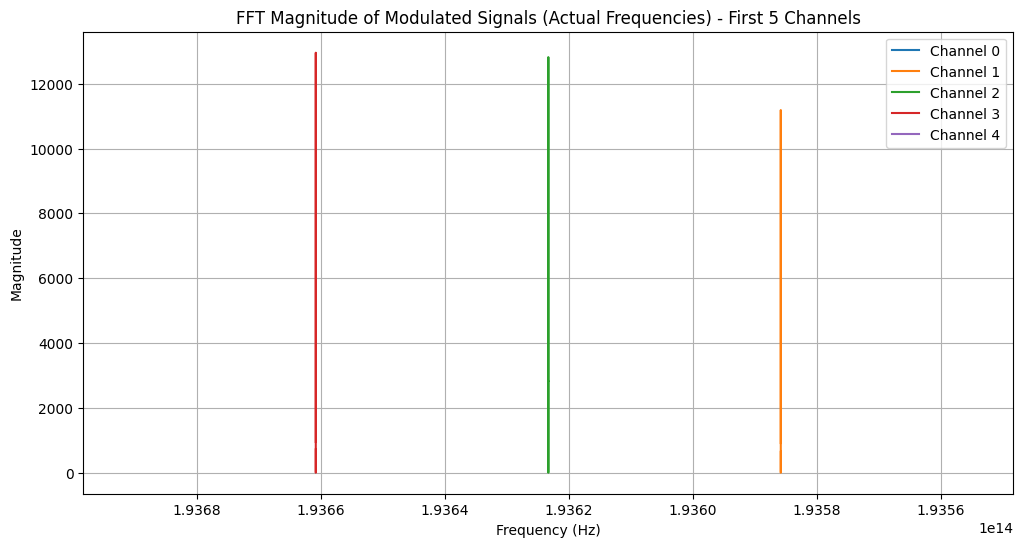

In [117]:
# Select different channels to plot (first 5)
channel_indices_to_plot = [0, 1, 2, 3, 4]

# Increase the sampling rate for FFT calculation to better visualize the spread
fft_sampling_rate_factor = 4
fft_sampling_rate = sps * fft_sampling_rate_factor

plt.figure(figsize=(12, 6))

# Calculate the sampling frequency based on the time vector and its length
# The time vector is created with a step of 1/(sps * 1), so the sampling rate is sps * 1
sampling_rate = sps * 1
n_samples = multi_channel_signal.shape[1]

for channel_index in channel_indices_to_plot:
    signal = multi_channel_signal[channel_index]
    # Perform FFT with a higher sampling rate for better spectral resolution
    fft_signal = np.fft.fft(signal, n=int(n_samples * fft_sampling_rate_factor))

    carrier_frequency = 3e8 / channeled_lambdas[channel_index]

    # Frequencies for the FFT plot, based on the higher FFT sampling rate
    frequencies_relative_fft = np.fft.fftfreq(len(fft_signal), d=1/fft_sampling_rate)
    frequencies_actual_fft = frequencies_relative_fft + carrier_frequency

    plt.plot(np.fft.fftshift(frequencies_actual_fft), np.abs(np.fft.fftshift(fft_signal)), label=f'Channel {channel_index}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude of Modulated Signals (Actual Frequencies) - First 5 Channels')
plt.legend()
plt.grid(True)

# Set x-axis limits to show the range of the first 5 channels
if channel_indices_to_plot:
    min_channel_index = min(channel_indices_to_plot)
    max_channel_index = max(channel_indices_to_plot)
    # Calculate the approximate frequency range to cover the first 5 channels
    # Consider the carrier frequency of the lowest and highest channel and add some buffer
    min_freq_plot = 3e8 / channeled_lambdas[max_channel_index] - (fft_sampling_rate / 2) * 1.5 # Add buffer
    max_freq_plot = 3e8 / channeled_lambdas[min_channel_index] + (fft_sampling_rate / 2) * 1.5 # Add buffer
    plt.xlim(min_freq_plot, max_freq_plot)


plt.show()

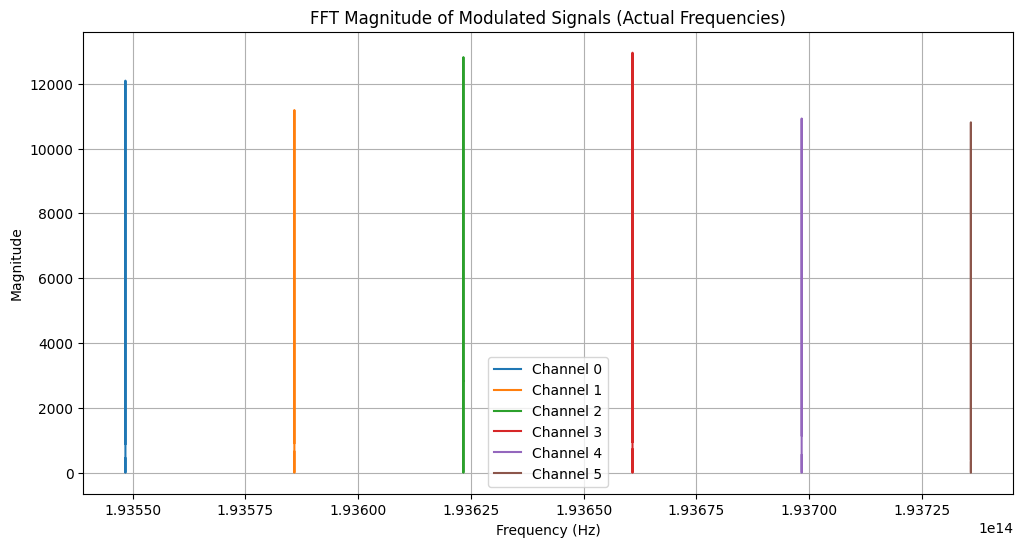

In [118]:
# Select different channels to plot
channel_indices_to_plot_all = [0, 1, 2, 3, 4, 5]

# Increase the sampling rate for FFT calculation to better visualize the spread
fft_sampling_rate_factor = 4
fft_sampling_rate = sps * fft_sampling_rate_factor

plt.figure(figsize=(12, 6))

# Calculate the sampling frequency based on the time vector and its length
# The time vector is created with a step of 1/(sps * 1), so the sampling rate is sps * 1
sampling_rate = sps * 1
n_samples = multi_channel_signal.shape[1]

for channel_index in channel_indices_to_plot_all:
    signal = multi_channel_signal[channel_index]
    # Perform FFT with a higher sampling rate for better spectral resolution
    fft_signal = np.fft.fft(signal, n=int(n_samples * fft_sampling_rate_factor))

    carrier_frequency = 3e8 / channeled_lambdas[channel_index]

    # Frequencies for the FFT plot, based on the higher FFT sampling rate
    frequencies_relative_fft = np.fft.fftfreq(len(fft_signal), d=1/fft_sampling_rate)
    frequencies_actual_fft = frequencies_relative_fft + carrier_frequency

    plt.plot(np.fft.fftshift(frequencies_actual_fft), np.abs(np.fft.fftshift(fft_signal)), label=f'Channel {channel_index}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude of Modulated Signals (Actual Frequencies)')

plt.legend()
plt.grid(True)
plt.show()